In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
olympic=pd.read_csv("/home/developer/Downloads/athlete_events.csv")


In [4]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Use the describe method to check the numerical columns  
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# Fill the missing values in the column Medal with string of 'NA 
olympic["Medal"]=olympic["Medal"].fillna("NA")

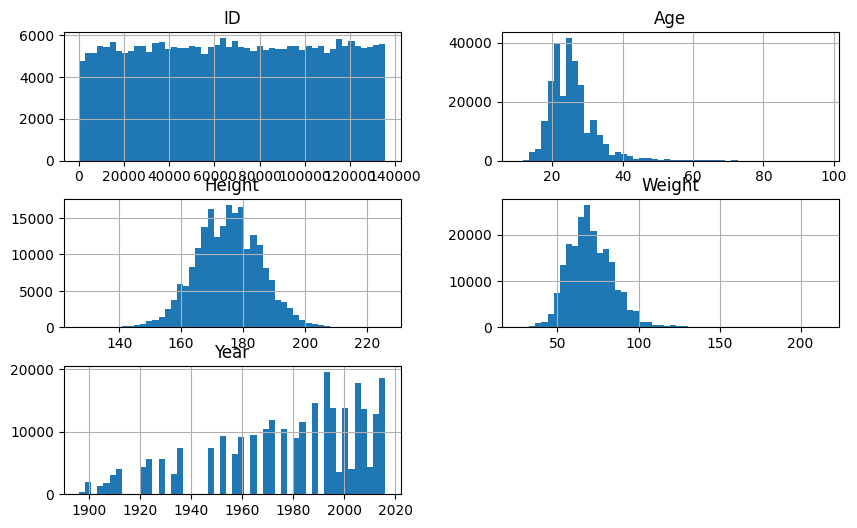

In [7]:
# Plot the histograms of the numerical columns using Pandas 
olympic.hist(bins=50,figsize=(10,6))
plt.show()

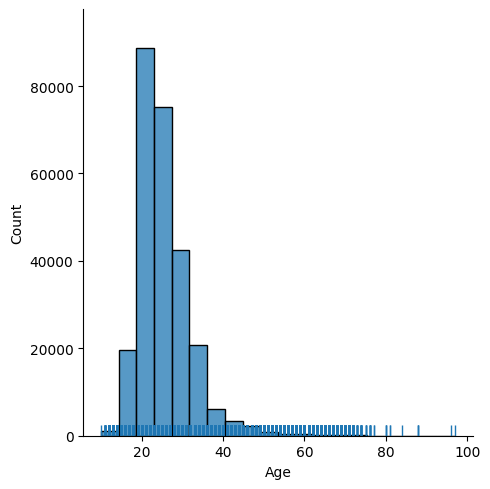

In [8]:
# . Plot the histogram with a rug plot of the column Age using Seaborn, with both 20
sns.displot(data=olympic, x='Age', bins=20, rug=True)
plt.show()

<Axes: >

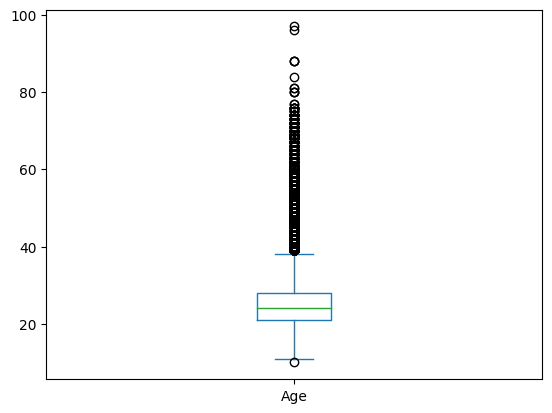

In [9]:
 # Plot the boxplot of the column Age using Pandas 
olympic["Age"].plot(kind="box")

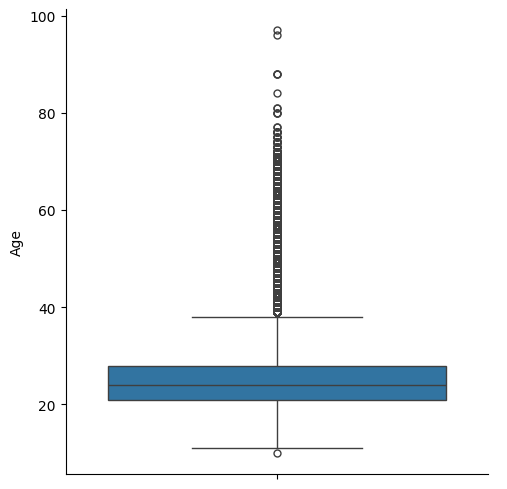

In [10]:
# Plot the boxplot of the column Age using Seaborn  '
sns.catplot(data=olympic,y="Age",kind="box")

In [11]:
 # Calculate the first quartile, third quartile, and IQR of the column Age  
q1 =olympic["Age"].quantile(0.25)
q3 =olympic["Age"].quantile(0.75)

iqr= q3-q1 
iqr # 7.0
lo= q1-1.5*iqr
lo  # 10.5
up=q3+1.5 *iqr
up  # 38.5

38.5

In [12]:
# to find outlier 
out=olympic[(olympic["Age"]<lo) |(olympic["Age"]>up)]
out.count()

ID        10317
Name      10317
Sex       10317
Age       10317
Height     4971
Weight     4685
Team      10317
NOC       10317
Games     10317
Year      10317
Season    10317
City      10317
Sport     10317
Event     10317
Medal     10317
dtype: int64

In [13]:
# . Check for the number of unique values in each column 
olympic.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

In [14]:
# Use the describe method to check the non-numerical columns  
olympic.describe(exclude="number")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,NA
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333


In [15]:
# Apply the value_counts method for each non-numerical column, check for their unique values and counts 
non_col=olympic.describe(exclude="number").columns
olympic[non_col].value_counts()

Name                        Sex  Team           NOC  Games        Season  City            Sport             Event                                                       Medal 
Robert Tait McKenzie        M    Canada         CAN  1932 Summer  Summer  Los Angeles     Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event           NA        43
Alfred James Munnings       M    Great Britain  GBR  1948 Summer  Summer  London          Art Competitions  Art Competitions Mixed Painting, Unknown Event              NA        25
Acee Blue Eagle             M    United States  USA  1932 Summer  Summer  Los Angeles     Art Competitions  Art Competitions Mixed Painting, Unknown Event              NA        17
Miltiades Manno             M    Hungary        HUN  1932 Summer  Summer  Los Angeles     Art Competitions  Art Competitions Mixed Painting, Unknown Event              NA        17
Stanisaw Noakowski          M    Poland         POL  1928 Summer  Summer  Amsterdam       Art Competi

In [16]:
# Check the first record within the dataset for each Olympic Sport   
olympic.sort_values("Year").groupby("Sport").first()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,32818,Reat Erce,M,17.0,162.0,50.0,Turkey,TUR,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA
Alpinism,74134,George Herbert Leigh Mallory,M,37.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Alpinism Mixed Alpinism,Gold
Archery,67722,Lecomte,M,47.0,174.0,82.0,France,FRA,1900 Summer,1900,Summer,Paris,"Archery Men's Au Cordon Dore, 50 metres",NA
Art Competitions,48741,Konrad Hippenmeier,M,31.0,175.0,76.0,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions Mixed Architecture,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,86368,August Nilsson,M,27.0,187.0,100.0,Denmark/Sweden,SWE,1900 Summer,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
Volleyball,14306,Georgi Spasov Boyadzhiev,M,21.0,177.0,76.0,Bulgaria,BUL,1964 Summer,1964,Summer,Tokyo,Volleyball Men's Volleyball,NA
Water Polo,74733,Auguste Jean Baptiste Louis Joseph Marc,M,19.0,185.0,95.0,Pupilles de Neptune de Lille #2-1,FRA,1900 Summer,1900,Summer,Paris,Water Polo Men's Water Polo,Bronze


In [17]:
# . What are the average Age, Height, Weight of female versus male Olympic athletes  
olympic.groupby('Sex')[['Age', 'Height', 'Weight']].mean()

,Age,Height,Weight
Sex,,,
F,23.732881,167.839740,60.021252
M,26.277562,178.858463,75.743677


In [18]:
olympic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [19]:
# What are the minimum, average, maximum Age, Height, Weight of athletes in different Year  
olympic.groupby("Year")[['Age',"Height","Weight"]].agg(["min","max","mean"])

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
1896  10.0  40.0  23.580645  154.0  188.0  172.739130   45.0  106.0  71.387755
1900  13.0  71.0  29.034031  153.0  191.0  176.637931   51.0  102.0  74.556962
1904  14.0  71.0  26.698150  155.0  195.0  175.788732   43.0  115.0  72.197279
1906  13.0  54.0  27.125253  165.0  196.0  178.206226   52.0  114.0  75.917073
1908  14.0  61.0  26.970228  157.0  201.0  177.543158   51.0  115.0  75.386128
1912  13.0  67.0  27.538620  157.0  200.0  177.447989   49.0  125.0  73.117450
1920  13.0  72.0  29.290978  142.0  197.0  175.752282   48.0  146.0  73.106157
1924  11.0  81.0  28.373325  142.0  200.0  174.963039   44.0  146.0  71.678261
1928  11.0  97.0  29.112557  147.0  211.0  175.162051   41.0  125.0  70.987465
1932  11.0  96.0  32.582080  147.0  200.0  174.220115   41.0  110.0  70.544545
1936  11.0  74.0  27.530328  147.0  205.0  175.723993   37.0  138.0  71.505572
1948  12.0  84.0  28.783947  140.0  213.0  176.172797   47.0  125.0  71.614248
1952  12.0  65.0  26.161546  150.0  213.0  174.138940   42.0  145.0  70.034522
1956  12.0  67.0  25.926674  137.0  218.0  173.900968   28.0  141.0  70.388433
1960  11.0  65.0  25.168848  137.0  218.0  173.141286   36.0  141.0  69.315195
1964  12.0  60.0  24.944397  137.0  218.0  173.448574   38.0  163.0  69.710271
1968  11.0  68.0  24.248046  127.0  216.0  173.945865   34.0  163.0  69.596896
1972  12.0  69.0  24.308607  130.0  223.0  174.565363   38.0  182.0  70.002506
1976  12.0  70.0  23.841818  136.0  220.0  174.920528   30.0  163.0  70.129375
1980  13.0  70.0  23.694743  131.0  220.0  175.527488   25.0  190.0  70.717600
1984  12.0  60.0  23.898347  132.0  218.0  175.540855   31.0  150.0  70.243286
1988  11.0  70.0  24.079432  127.0  223.0  175.745252   32.0  161.0  70.485319
1992  11.0  62.0  24.318895  136.0  223.0  176.174649   30.0  176.5  71.137975
1994  13.0  46.0  24.422103  148.0  200.0  175.169862   40.0  113.0  71.062100
1996  12.0  63.0  24.915045  136.0  223.0  175.895121   30.0  176.5  70.903281
1998  14.0  50.0  25.163197  142.0  200.0  174.581369   32.0  123.0  70.943734
2000  13.0  63.0  25.422504  136.0  226.0  176.089721   28.0  180.0  71.119046
2002  15.0  48.0  25.916281  149.0  201.0  174.702451   42.0  123.0  71.197070
2004  13.0  57.0  25.639515  139.0  226.0  175.972850   30.0  198.0  71.280695
2006  14.0  52.0  25.959151  147.0  206.0  174.623172   38.0  127.0  70.519354
2008  12.0  67.0  25.734118  137.0  226.0  176.211062   28.0  214.0  71.397679
2010  15.0  51.0  26.124262  149.0  206.0  174.918182   38.0  116.0  70.740863
2012  13.0  71.0  25.961378  140.0  221.0  176.262469   33.0  214.0  71.319586
2014  15.0  55.0  25.987324  146.0  206.0  174.816670   41.0  116.0  70.760111
2016  13.0  62.0  26.207919  133.0  218.0  176.034266   30.0  170.0  70.988637

In [20]:
# . What are the minimum, average, median, maximum Age of athletes for different Season and Sex combinations 
olympic.groupby(["Season","Sex"])["Age"].agg(["min","max","median","mean"])

min   max  median       mean
Season Sex                               
Summer F    11.0  74.0    23.0  23.660997
       M    10.0  97.0    25.0  26.443944
Winter F    11.0  48.0    24.0  24.014398
       M    12.0  58.0    25.0  25.504261

In [21]:
# What are the average Age of athletes, and numbers of unique Team, Sport, Event, for different Season and Sex combinations  
group_data=olympic.groupby(["Season","Sex"]).agg({"Age":"mean","Team":"nunique","Sport":"nunique","Event":"nunique"})
group_data

Age  Team  Sport  Event
Season Sex                               
Summer F    23.660997   352     40    214
       M    26.443944  1118     49    491
Winter F    24.014398   144     14     57
       M    25.504261   214     17     67

In [22]:
# . What are the average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations  
olympic.groupby(["Medal","Season","Sex"])[["Age","Height","Weight"]].agg("mean")

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.632028  170.861847  63.476378
              M    26.350804  181.142241  78.886354
       Winter F    25.115578  166.953982  60.677477
              M    26.386169  179.678673  78.709223
Gold   Summer F    24.211986  171.381818  63.795652
              M    26.488940  181.680343  79.632568
       Winter F    25.202636  167.218371  61.764235
              M    26.603701  180.323636  79.354069
NA     Summer F    23.524566  167.598860  59.412097
              M    26.433475  178.468472  74.973865
       Winter F    23.854310  166.420642  59.520347
              M    25.376253  178.495761  76.009897
Silver Summer F    24.290199  171.074931  63.461338
              M    26.666667  181.333929  79.274533
       Winter F    25.240527  167.618307  61.681338
              M    26.430566  179.737705  78.564711

<Axes: xlabel='Height', ylabel='Weight'>

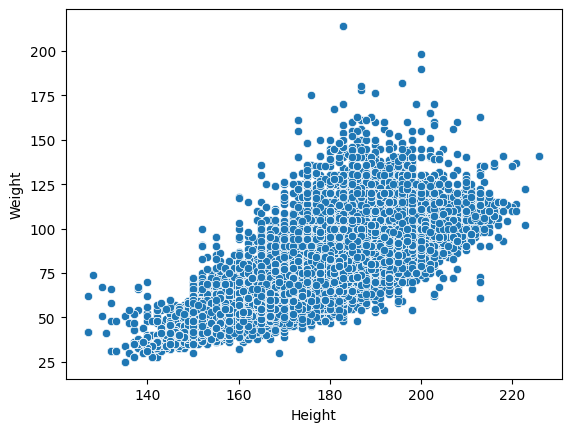

In [23]:
# Plot the scatterplot of Height and Weight 
sns.scatterplot(data=olympic,x="Height",y="Weight")

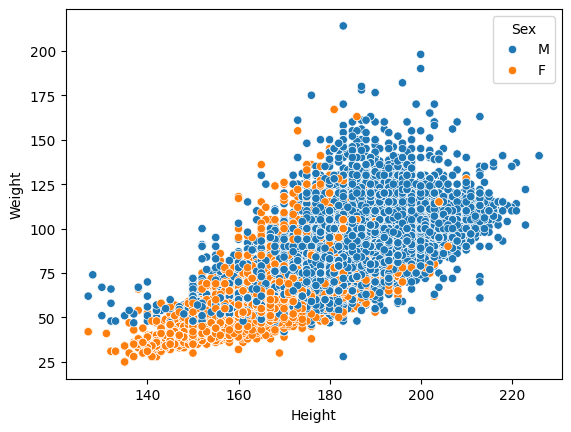

In [24]:
 # Plot the scatterplot of Height and Weight, using different colors and styles of dots for different Sex  
sns.scatterplot(data=olympic,x="Height",y="Weight",hue="Sex")
plt.show()

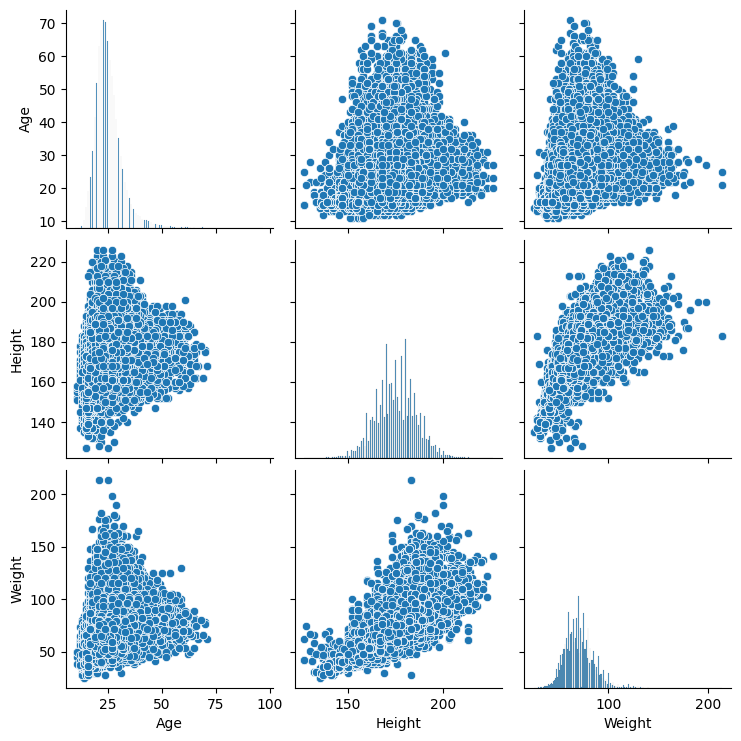

In [25]:
# . Plot the pairwise relationships of Age, Height, Weight  
sns.pairplot(olympic[["Age","Height","Weight"]])

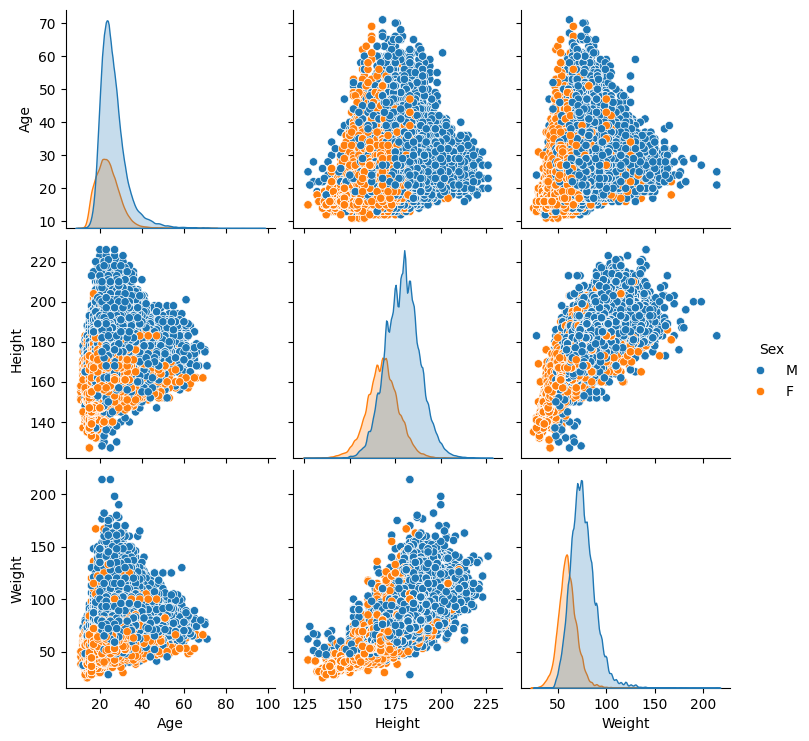

In [26]:
 # Plot the pairwise relationships of Age, Height, Weight, with different colors for Sex  
sns.pairplot(olympic[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')
plt.show()


In [27]:
 # Print out the correlation matrix of Age, Height, Weight 
olympic[["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


<Axes: >

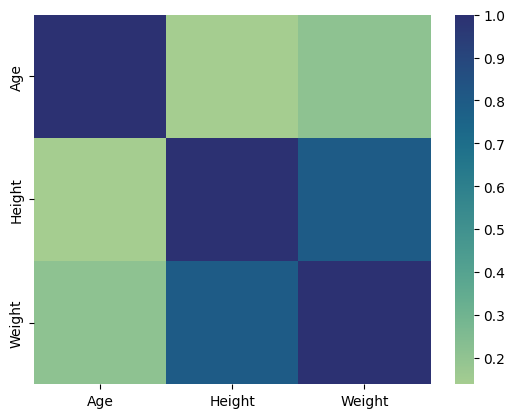

In [28]:
# . Use heatmap to demonstrate the correlation matrix of Age, Height, Weight, use a colormap (cmap) of 'crest' 
sns.heatmap(olympic[["Age","Height","Weight"]].corr(),cmap='crest')

In [29]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
olympic.groupby("Sex")[["Age","Height","Weight"]].mean()

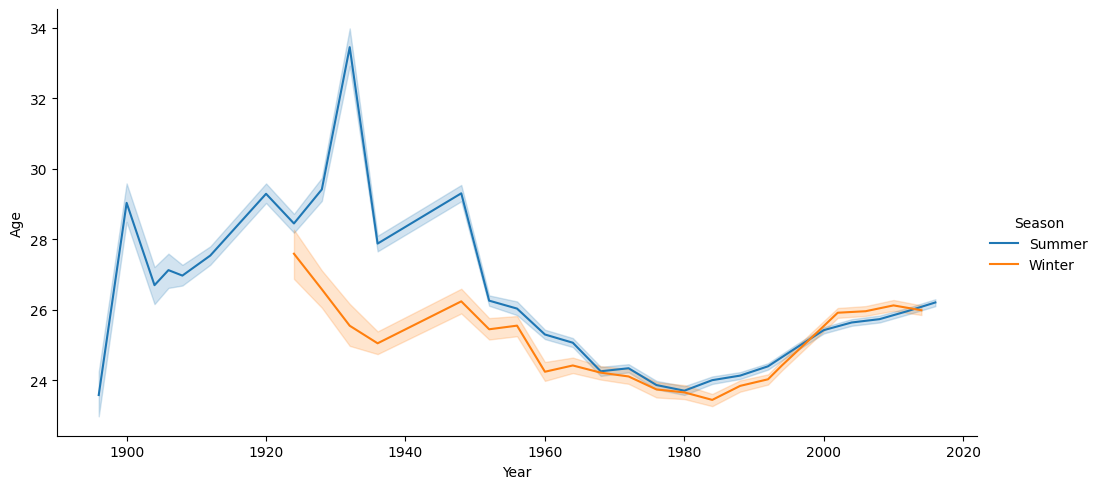

In [40]:
# Look at the changes of average Age across Year by line charts, with separate lines for different Season using different colors 
olympic["Age_mean"] =olympic["Age"].mean()
sns.relplot(x='Year',y="Age",data=olympic,hue="Season",aspect=2,kind="line")

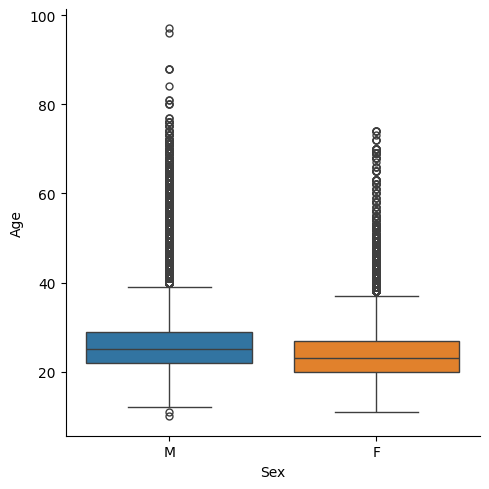

In [45]:
# . Look at the distributions of Age for different Sex using boxplots  
sns.catplot(data=olympic,y="Age",x="Sex",kind='box',hue="Sex")

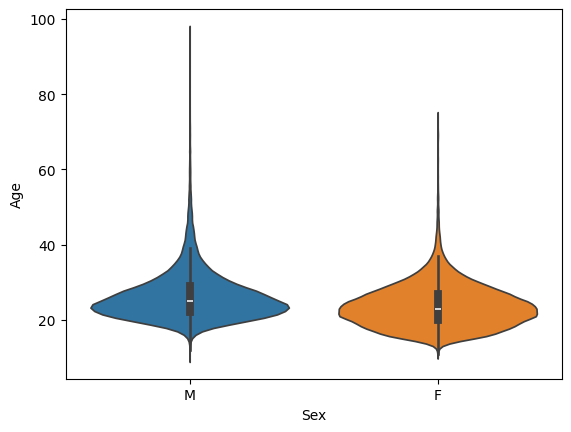

In [49]:
 # Look at the distributions of Age for different Sex using violin plots  
sns.violinplot(y="Age",x="Sex",data=olympic,hue="Sex")
plt.show()

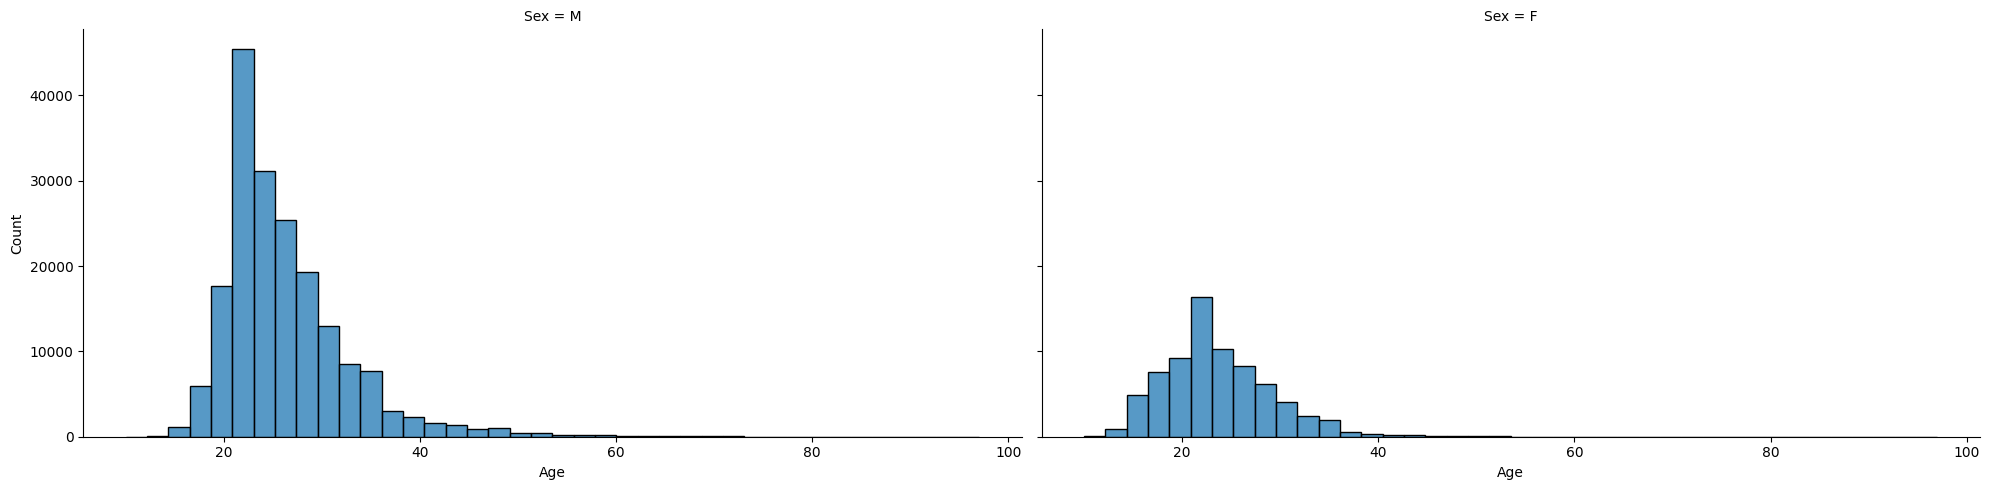

In [34]:
# Plot the histograms of Age, with different colors for different Sex  
sns.displot(data=olympic,x="Age",aspect=2,col="Sex",bins=40)
plt.show()

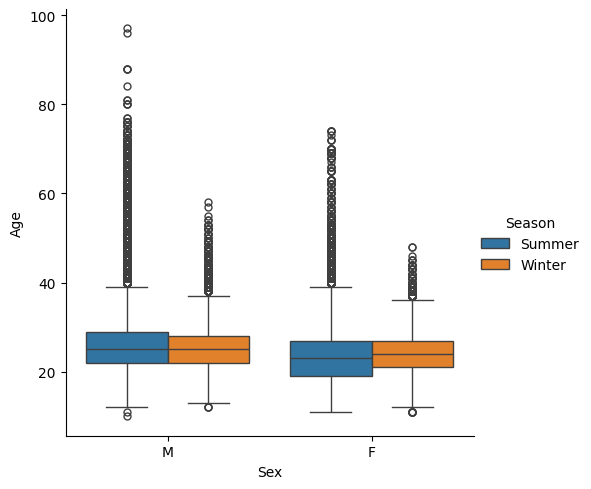

In [54]:
# Look at the distributions of Age for different Sex using boxplots, with different colors of plots for different Season  
sns.catplot(x="Sex",y="Age",hue="Season",kind="box",data=olympic)
plt.show()

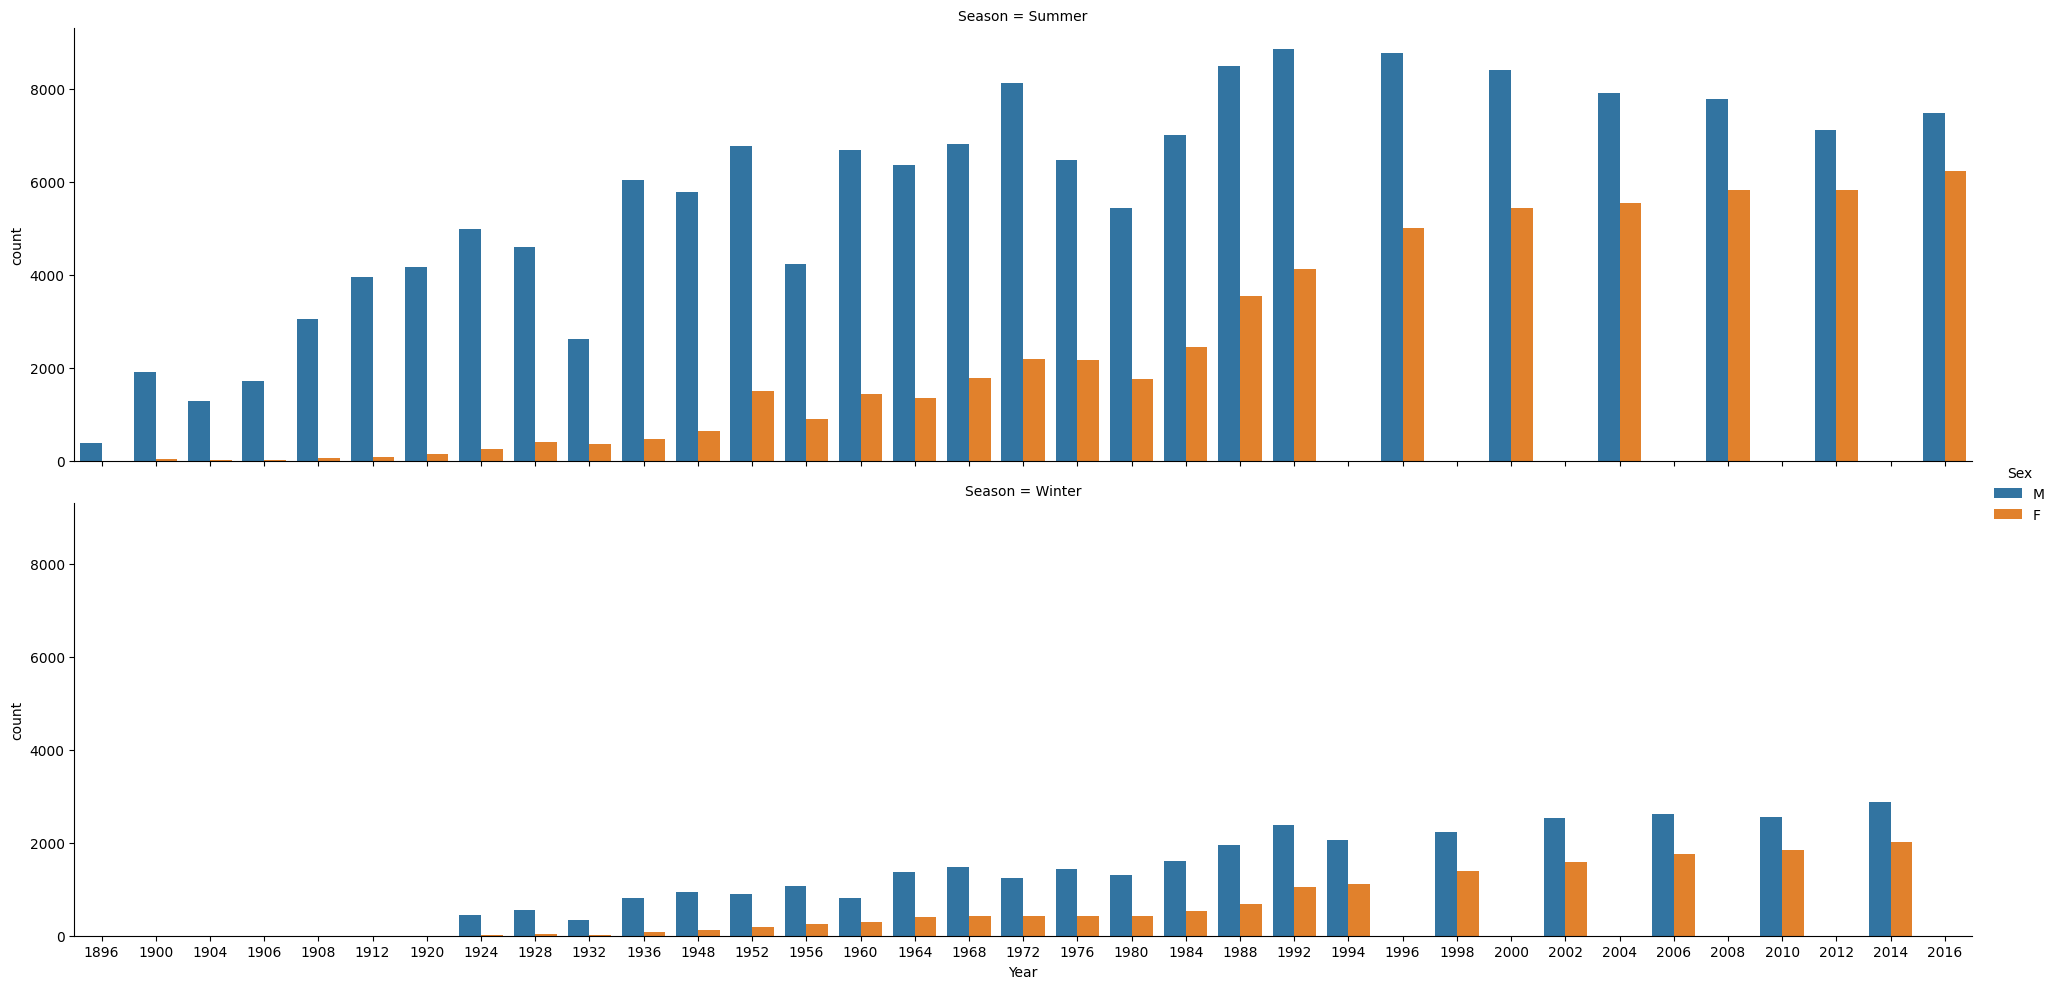

In [62]:
# Use count plots to look at the changes of number of athlete-events across Year, for different Sex by colors, and different Season on separate plots   
sns.catplot(x="Year",hue="Sex",col="Season",aspect=4,col_wrap=1,data=olympic,kind="count")
plt.show()

In [63]:
olympic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Age_mean'],
      dtype='object')

In [64]:
# How many male and female athletes are there?   
olympic.groupby("Sex").sum()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_mean
Sex,,,,,,,,,,,,,,,
F,5213314903,Christine Jacoba AaftinkChristine Jacoba Aafti...,1758559.0,11308706.0,4007679.0,NetherlandsNetherlandsNetherlandsNetherlandsNe...,NEDNEDNEDNEDNEDNEDNEDNEDFINFINFINNORROUNORNEDN...,1988 Winter1988 Winter1992 Winter1992 Winter19...,148481042,WinterWinterWinterWinterWinterWinterSummerSumm...,CalgaryCalgaryAlbertvilleAlbertvilleLillehamme...,Speed SkatingSpeed SkatingSpeed SkatingSpeed S...,Speed Skating Women's 500 metresSpeed Skating ...,NANANANANANANANANANANAGoldNANABronzeBronzeNANA...,1.904551e+06
M,13290068617,A DijiangA LamusiGunnar Nielsen AabyEdgar Lind...,4928199.0,25678173.0,10715458.0,ChinaChinaDenmarkDenmark/SwedenUnited StatesUn...,CHNCHNDENDENUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,1992 Summer2012 Summer1920 Summer1900 Summer19...,387889018,SummerSummerSummerSummerWinterWinterWinterWint...,BarcelonaLondonAntwerpenParisAlbertvilleAlbert...,BasketballJudoFootballTug-Of-WarCross Country ...,Basketball Men's BasketballJudo Men's Extra-Li...,NANANAGoldNANANANANANANANANANANANANANANANANANA...,5.024333e+06
